# We will use Boston California Housing Pricing Dataset for this 

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

In [26]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA (Exploratory Data Analysis)

In [27]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [28]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

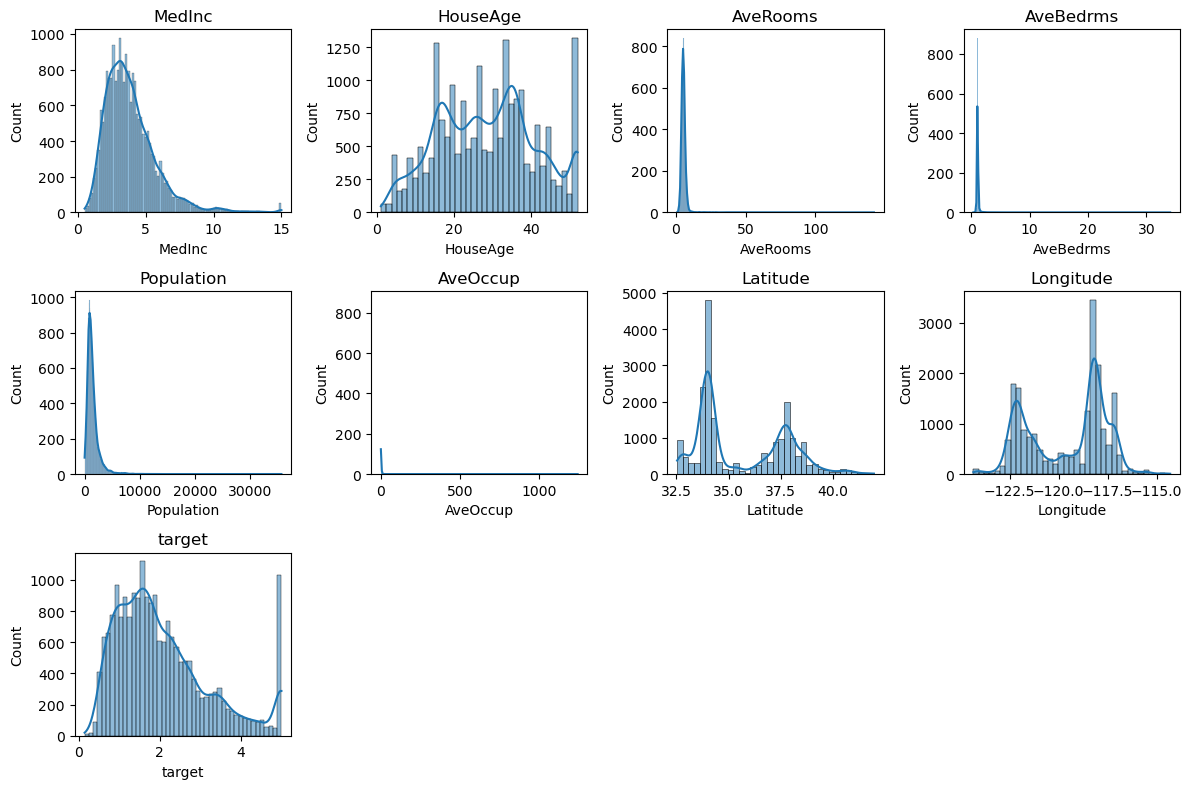

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

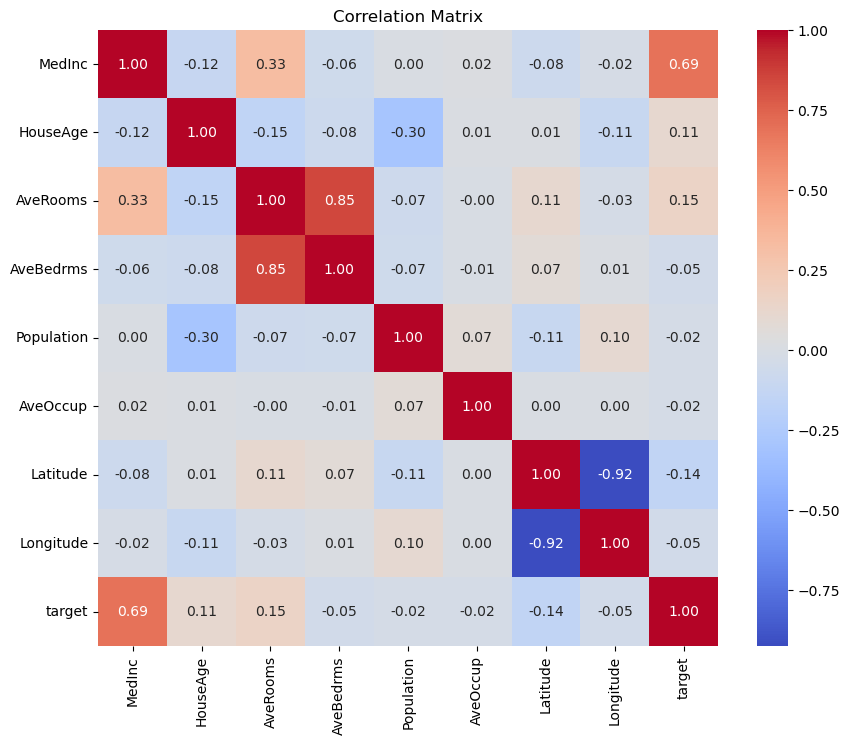

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

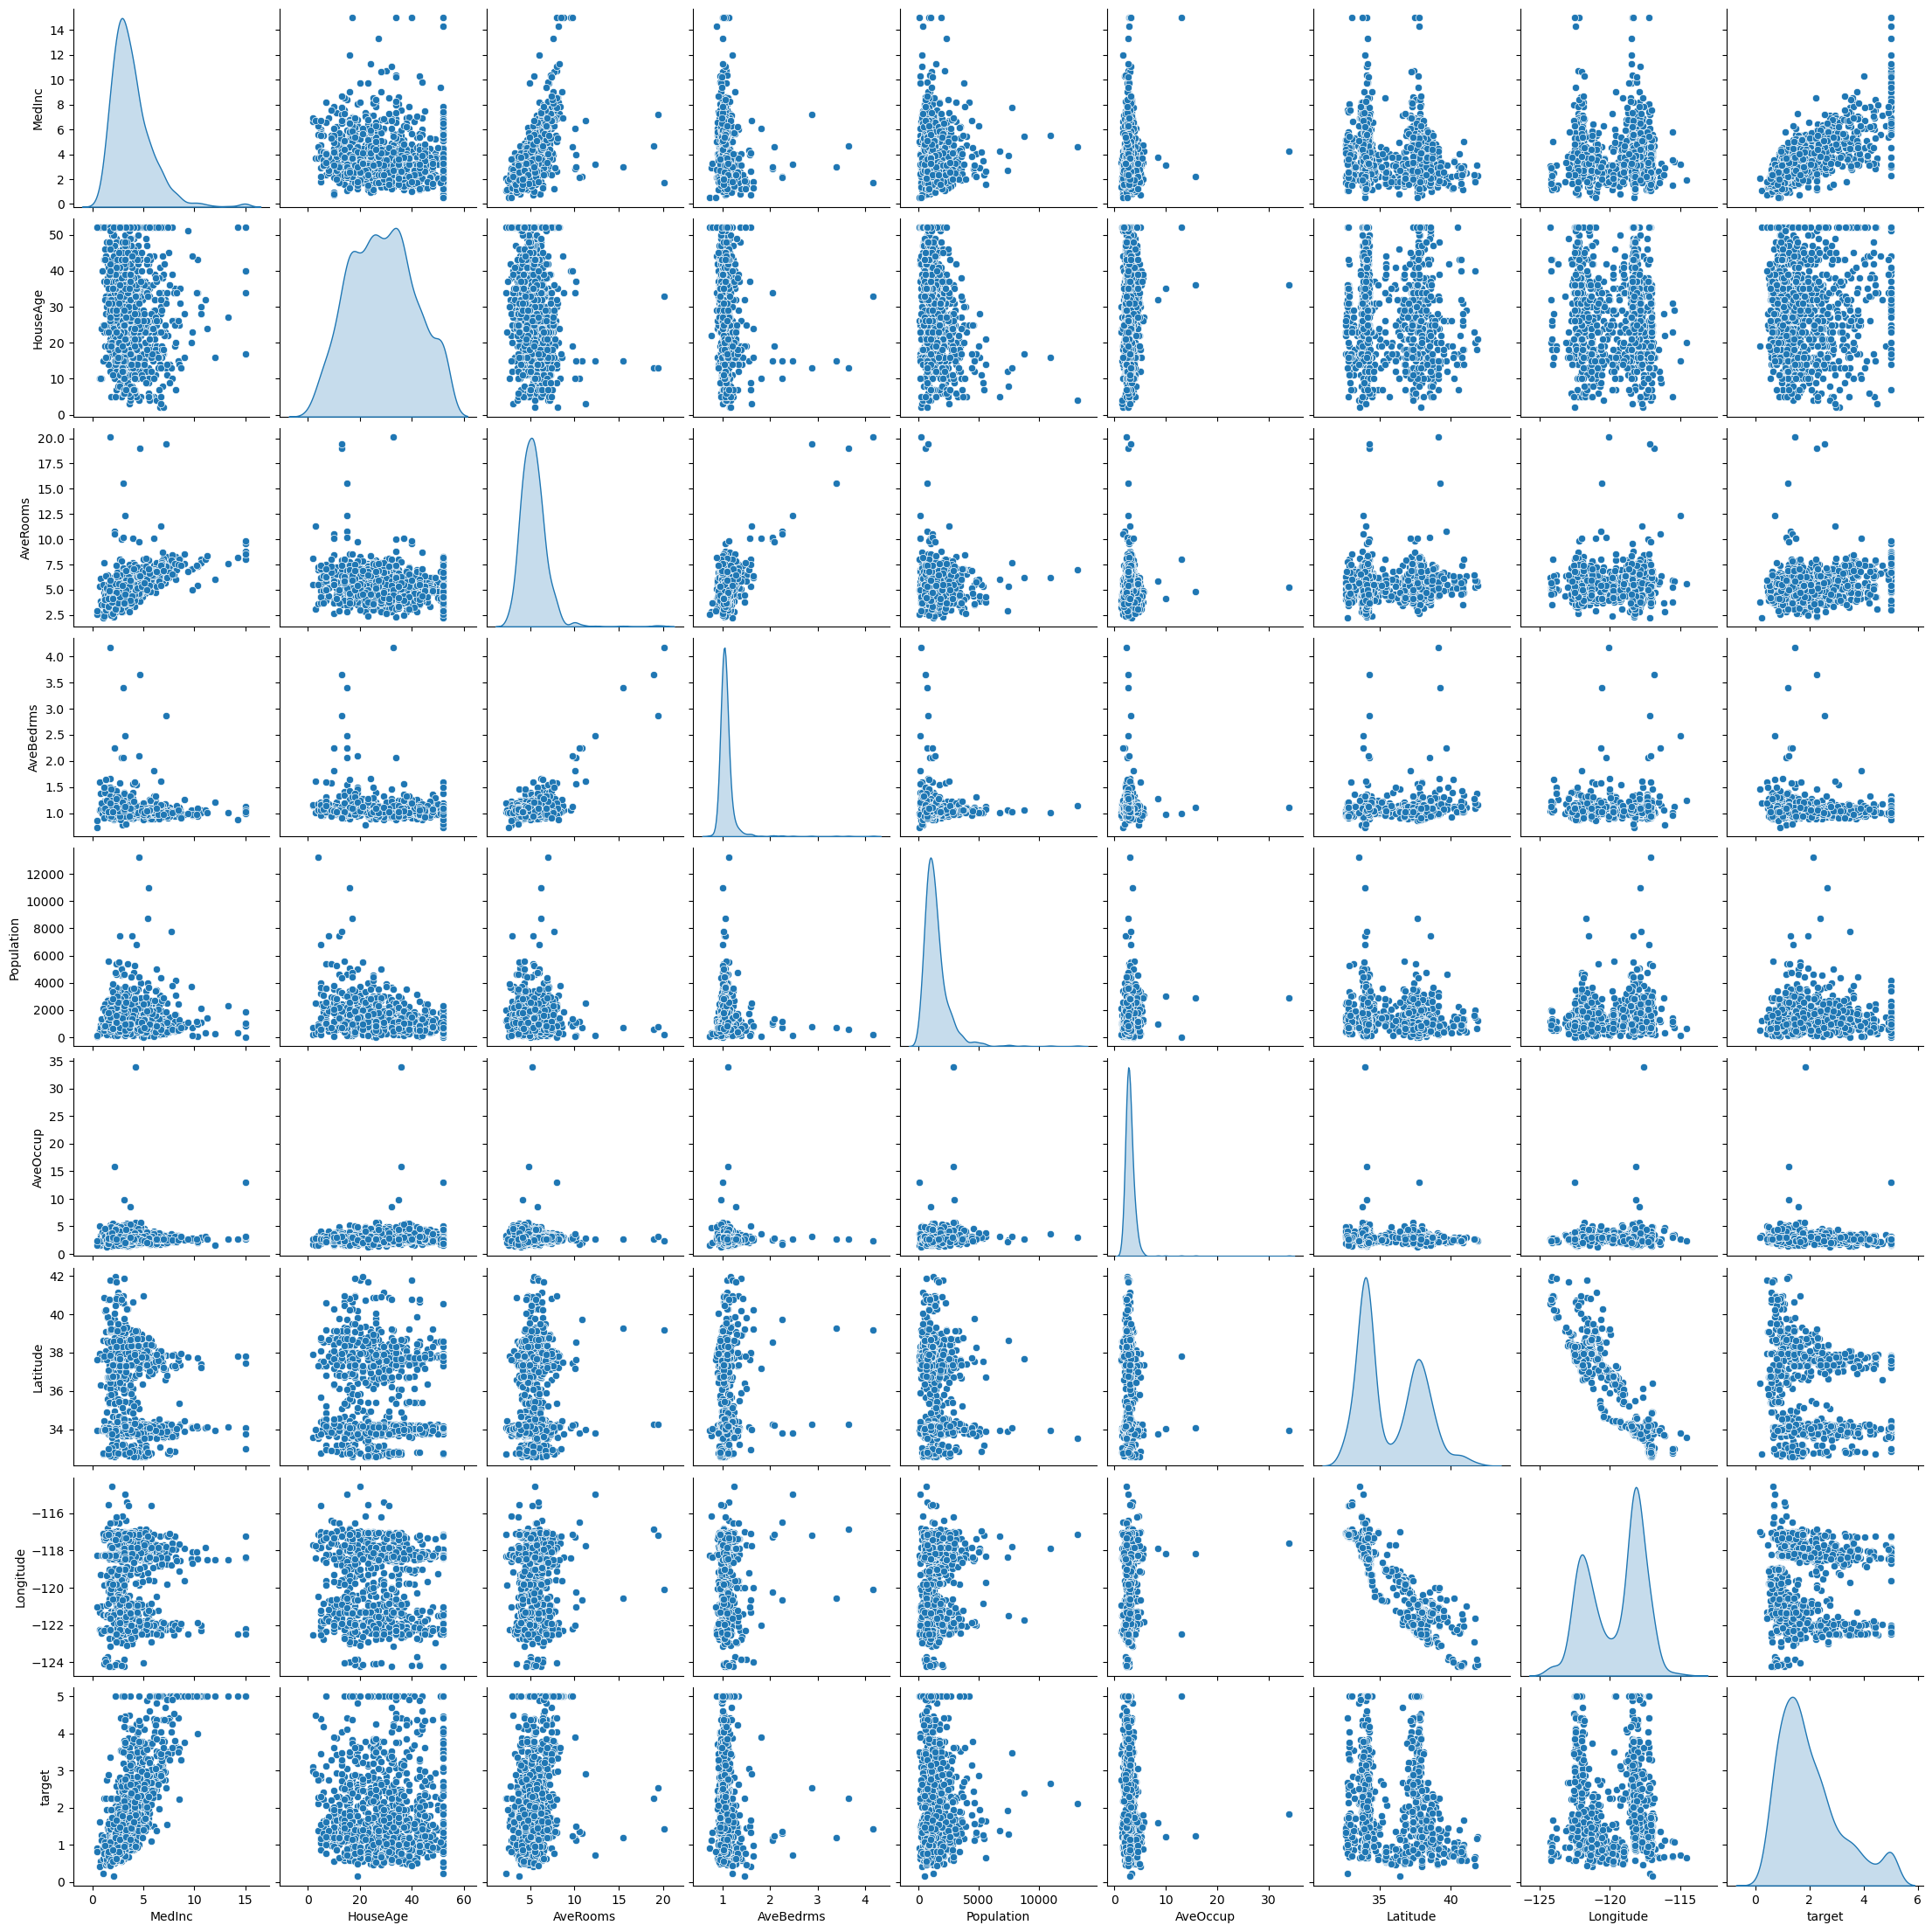

In [31]:
sns.pairplot(df.sample(1000), diag_kind='kde')
plt.show()

# Preprocess the Data

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Model using scikit-learn

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Scikit-learn Linear Regression MSE: {mse_lr:.2f}')

Scikit-learn Linear Regression MSE: 0.56


# Creating a Neural Network Using Tensorflow 

In [35]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model

In [36]:
model.compile(optimizer='adam', loss='mse')

# Train the model

In [37]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 [==============================] - 2s 2ms/step - loss: 0.7898
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3884
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3690
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3496
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3556
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3183
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3096
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3265
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2991
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2959
Epoch 11/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3042
Epoch 12/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2904
Epoch 13/100


# Predict and evaluate

In [38]:
y_pred_tf = model.predict(X_test)
mse_tf = mean_squared_error(y_test, y_pred_tf)
print(f'TensorFlow Neural Network MSE: {mse_tf:.2f}')

129/129 [==============================] - 0s 2ms/step
TensorFlow Neural Network MSE: 0.27
